# **Numpy Basics**
Answer the following questions as per respective instructions.


In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

##### Problem 1:
Find the inverse matrix of a random matrix ensuring the following criteria:


*   Define a function named `inv` that takes in a square matrix as a parameter which returns an inverse matrix after calculating the determinant, `det` (use the `np.linalg.det` method) and adjugate matrix, `adj` when `det!=0` else returns **"Insverse Matrix Doesn't Exist"**. Hint: https://www.cuemath.com/algebra/inverse-of-a-matrix/



*   Set the value of the `seed` variable equal to your **roll number** and generate a random matrix of integer values between **0** to **99** of shape 4 x 4.

*   Use the `inv` function to calculate $A^{-1}$ and show that $A \times A^{-1}$ is equal to $I_4$.



In [2]:
# define `inv` function
# write your code from here:
def inv(mat):
    if mat.shape[0] != mat.shape[1]:
      return "Matrix must be square"
    det = np.linalg.det(mat)
    if det == 0:
        return "Inverse Matrix Doesn't Exist"
    else:
        adj = np.linalg.inv(mat) * det
        return adj / det


In [24]:
# set seed = your roll number
seed = 2021607
np.random.seed(seed)

# write your code from here:
A = np.random.randint(0,100,(4,4))
print (A)
A_inv = inv(A)

a_a_inv = np.dot (A, A_inv)
i4 = np.eye(4)

if ( np.allclose (a_a_inv, i4 )):
  print ("A×A_inv = I4")
else:
  print ("AxA_inv =/= I4")

[[30 49 52 43]
 [37 21 43  8]
 [69  3 10 87]
 [49 67 38 80]]
A×A_inv = I4


##### Problem 2:
Complete the code below to display an RGB color image ensuring the following steps:


*   Click [here](https://drive.google.com/file/d/15VT8TcJj6mF8hFFbJsXQ18hsbcHzt1J1/view?usp=sharing) to download the "data.npz" file and upload it in the current working directory.
*   Use the `np.linalg.inv` method to find the inverse matrix of `R`, `G` and `B` matrices.
*   Combine the inverse `R`, `G` and `B` matrices (each of shape $2000 \times 2000$) into a single matrix of shape $2000 \times 2000 \times 3$ such that each of the three matrices represent the RGB color channels [Hint: Create a zero matrix of `dtype = "uint8"` with the shape equal to the shape of `R`, `G` or `B`, and store their inverse matrix in `img` variable using appropriate indexing.]
*   Display the img variable as an image using `plt.imshow` method.


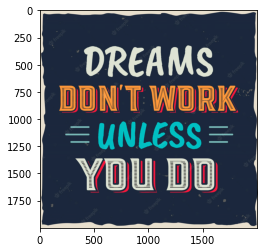

In [22]:
data  = np.load("data.npz")
R, G, B = data["R"], data["G"], data["B"]
# write your code here:
img = np.zeros((2000, 2000, 3), dtype="uint8") 
img[:, :, 0] = np.linalg.inv(R) 
img[:, :, 1] = np.linalg.inv(G) 
img[:, :, 2] = np.linalg.inv(B)

plt.imshow(img) 
plt.show() 

# Taylor Series Approximation

##### Problem 3:
Around $a = 0$ for $x \in [-1, 1]$ with interval 0.01:
* Compute $4^{th}$ order Taylor approximation of $e^{(m-n)x}$.
* Compute $e^{(m-n)x}$ by the multiplying the Taylor approximation of $e^{mx}$ and $e^{-nx}$.
* Plot the values of $e^{(m-n)x}$ obtained through both ways along with their actual values (without any approximation) on the same graph using `plt.plot`.

Here:

m = last digit of your roll number + 1

n = last digit of your roll number - 1

If m or n is 0 or 1 for your case, use m = 5 and n = 3.



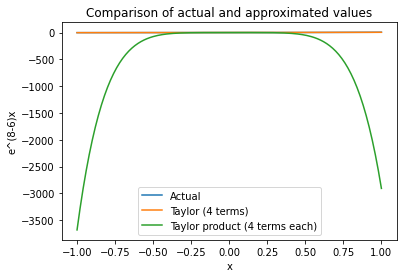

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# last digit = 7 so m = 7+1 = 8, n = 7-1 =6
# m = 8, n = 6

def taylor_exp(x, n):
    sum = 0
    for i in range(n):
        sum += x**i / np.math.factorial(i)
    return sum

def taylor_prod(x, n):
    return taylor_exp((8*x), n) * taylor_exp((-6*x), n)

x = np.arange(-1, 1.01, 0.01)

y_actual = np.exp((8-6)*x) 
y_taylor_4 = (taylor_exp((8-6)*x, 4)) 
y_taylor_prod_4 = (taylor_prod(x, 4)) 

plt.plot(x, y_actual, label='Actual')
plt.plot(x, y_taylor_4, label='Taylor (4 terms)')
plt.plot(x, y_taylor_prod_4 , label='Taylor product (4 terms each)')
plt.xlabel('x')
plt.ylabel('e^(8-6)x')
plt.title('Comparison of actual and approximated values')
plt.legend()
plt.show()